# Exploratory Analysis

In [109]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import gensim
import string
import seaborn as sns
source_colors = list(sns.color_palette('colorblind'))
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('sentiwordnet')
from nltk import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/janawicklein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/janawicklein/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/janawicklein/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [110]:
#load pandas dataframe from all_articles.csv
df = pd.read_csv('Data/all_articles.csv')
#tokenize text
df['tokenized_text'] = df['body'].apply(nltk.word_tokenize)

In [111]:
#find null values or missing values in the dataframe in case there are any
df.isnull().sum()

source            0
date              0
title             0
words             0
body              0
tokenized_text    0
dtype: int64

In [112]:
# remove punctuation

# Make a table that 'translates' all punctuation to None (i.e. empty) 
table = str.maketrans('', '', string.punctuation)
punct_table = {chr(key):value for (key, value) in table.items()}
punct_table[' --']= 'None'
punct_table

{'!': None,
 '"': None,
 '#': None,
 '$': None,
 '%': None,
 '&': None,
 "'": None,
 '(': None,
 ')': None,
 '*': None,
 '+': None,
 ',': None,
 '-': None,
 '.': None,
 '/': None,
 ':': None,
 ';': None,
 '<': None,
 '=': None,
 '>': None,
 '?': None,
 '@': None,
 '[': None,
 '\\': None,
 ']': None,
 '^': None,
 '_': None,
 '`': None,
 '{': None,
 '|': None,
 '}': None,
 '~': None,
 ' --': 'None'}

In [113]:
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [item.translate(table) for item in x])

In [114]:
# keep only meaningful words by filtering out empty spaces and numbers
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [item for item in x if item.isalpha()])

In [115]:
# remove stopwords & transform to lowercase
# maybe run the same analysis without removing stopwords? could be interesting as well?
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [item.lower() for item in x if item.lower() not in nltk.corpus.stopwords.words('english')])

In [116]:
df['tokenized_text']

0      [one, man, wore, white, shirt, black, trousers...
1      [die, well, going, die, anyway, hong, kong, pr...
2      [hong, kong, backpedaling, mounting, pressure,...
3      [hong, kong, high, school, students, hong, kon...
4      [hong, kong, hong, kong, embattled, leader, ca...
                             ...                        
395    [richard, scotford, learned, extradition, bill...
396    [hong, kong, rated, companies, strong, financi...
397    [hong, kong, enjoyed, second, consecutive, day...
398    [thousands, mostly, young, took, hong, kong, m...
399    [hard, say, anything, publicly, protests, with...
Name: tokenized_text, Length: 400, dtype: object

In [117]:
#create seperate df for each source to not always have to group by source
# show all values of the column 'source' in the dataframe df -> why are there 2 different nyt values? -> merge them
df['source'] = df['source'].apply(lambda x: x.replace('The New York Times ', 'The New York Times'))
df['source'].unique()

# # filter df by source
df_nyt = df[df['source'] == 'The New York Times']
df_scmp = df[df['source'] == 'South China Morning Post']

df_nyt

,source,date,title,words,body,tokenized_text
0,The New York Times,2019-08-27,"In Hong Kong , Photo Evokes Tiananmen",573,\nOne man wore a white shirt and black trouser...,"[one, man, wore, white, shirt, black, trousers..."
1,The New York Times,2019-08-30,"In Hong Kong , Playing Tennis With Tear-Gas Gr...",908,"\n“If we die, well, we were going to die anywa...","[die, well, going, die, anyway, hong, kong, pr..."
2,The New York Times,2019-06-19,Top Leader in Hong Kong Apologizes for Bill Th...,1056,\nHONG KONG -- Backpedaling under mounting pre...,"[hong, kong, backpedaling, mounting, pressure,..."
3,The New York Times,2019-09-03,Bringing Activism to Hong Kong 's Schools,1235,\nHONG KONG -- High school students in Hong Ko...,"[hong, kong, high, school, students, hong, kon..."
4,The New York Times,2019-07-10,"Hong Kong Leader Retreats, Calling Extradition...",1230,"\nHONG KONG -- Hong Kong's embattled leader, C...","[hong, kong, hong, kong, embattled, leader, ca..."
...,...,...,...,...,...,...
195,The New York Times,2019-07-03,Videos From Protests Put Glare on Hong Kong Po...,1530,\nDozens of people in Hong Kong say they were ...,"[dozens, people, hong, kong, say, injured, pol..."
196,The New York Times,2019-08-04,"Hong Kong Protests Spread, Leaving City Paralyzed",3040,\nThe city descended into chaos despite the le...,"[city, descended, chaos, despite, leader, warn..."
197,The New York Times,2019-09-18,Hong Kong Unrest Leads to Cancellation of Hors...,566,\nHONG KONG — A night of horse racing at Hong ...,"[hong, kong, night, horse, racing, hong, kong,..."
198,The New York Times,2019-11-12,"Behind the Protesters_ Pastors, Medics, Artist...",1549,\nHONG KONG -- The pastor pulled on his respir...,"[hong, kong, pastor, pulled, respirator, ran, ..."


In [118]:
#compare most frequent words between the two sources New York Times and South China Morning Post
from nltk.probability import FreqDist
# create a list of all words in the column tokenized_text
all_words = []
for i in df_nyt['tokenized_text']:
    for j in i:
        all_words.append(j)
freqdist_nyt = FreqDist(all_words)
freqdist_nyt.most_common(20)

[('hong', 2708),
 ('kong', 2624),
 ('protesters', 2283),
 ('police', 2115),
 ('said', 1817),
 ('protests', 978),
 ('people', 916),
 ('government', 853),
 ('china', 809),
 ('city', 711),
 ('lam', 630),
 ('chinese', 629),
 ('would', 593),
 ('officers', 581),
 ('one', 576),
 ('protest', 477),
 ('mr', 471),
 ('many', 448),
 ('gas', 431),
 ('mainland', 425)]

In [119]:
# create a list of all words in the column tokenized_text
all_words = []
for i in df_scmp['tokenized_text']:
    for j in i:
        all_words.append(j)
freqdist_scmp = FreqDist(all_words)
freqdist_scmp.most_common(20)

[('protesters', 1609),
 ('said', 1567),
 ('police', 1335),
 ('kong', 982),
 ('hong', 971),
 ('protests', 616),
 ('would', 472),
 ('people', 458),
 ('also', 431),
 ('city', 430),
 ('government', 422),
 ('one', 357),
 ('officers', 329),
 ('protest', 290),
 ('bill', 285),
 ('yesterday', 276),
 ('force', 263),
 ('violence', 259),
 ('university', 256),
 ('two', 235)]

In [120]:
words_freq_nyt = pd.DataFrame(freqdist_nyt.items(), columns=['word', 'frequency'])
words_freq_nyt.sort_values(by='frequency', ascending=False, inplace=True)
words_freq_nyt['source'] = 'The New York Times'

In [121]:
words_freq_scmp = pd.DataFrame(freqdist_scmp.items(), columns=['word', 'frequency'])
words_freq_scmp.sort_values(by='frequency', ascending=False, inplace=True)
words_freq_scmp['source'] = 'South China Morning Post'

In [122]:
#concat the two dataframes
words_freq = pd.concat([words_freq_nyt, words_freq_scmp],axis=0, ignore_index=False)
words_freq

,word,frequency,source
54,hong,2708,The New York Times
55,kong,2624,The New York Times
65,protesters,2283,The New York Times
17,police,2115,The New York Times
101,said,1817,The New York Times
...,...,...,...
6944,programming,1,South China Morning Post
6945,fill,1,South China Morning Post
6947,manyee,1,South China Morning Post
6952,broadcasting,1,South China Morning Post


In [123]:
same= []
#check for the first 25 words in pandas series words_freq_nyt if they are also in the first 25 words in words_freq_scmp
# i dont know why the fast way of doing this didnt work for me
for y in words_freq_nyt.head(25).word:
    for j in words_freq_scmp.head(25).word:
        if y == j:
            same.append(y)
        else:
            pass

clrs_nyt = []
for y in words_freq_nyt.head(25).word:
    if y in same:
        clrs_nyt.append("lightgrey")
    else:
        clrs_nyt.append(source_colors[0])
clrs_scmp = []
for y in words_freq_scmp.head(25).word:
    if y in same:
        clrs_scmp.append("lightgrey")
    else:
        clrs_scmp.append(source_colors[1])

[Text(0.5, 1.0, 'South China Morning Post')]

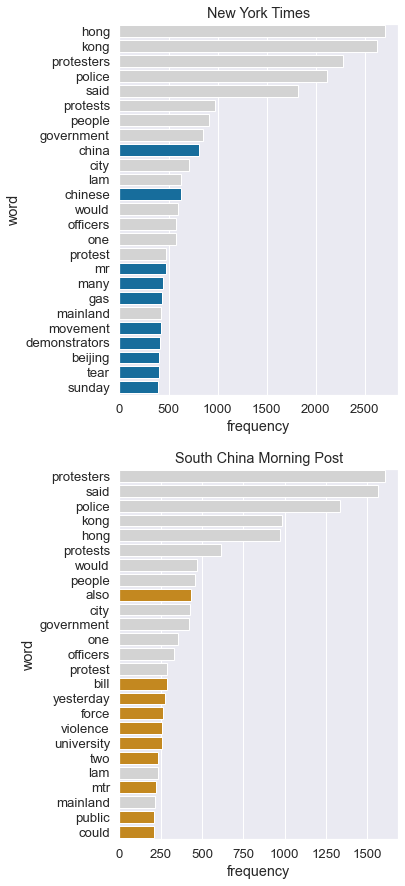

In [124]:
import seaborn as sns
# create subplot of the different data frames
fig, axes = plt.subplots(2,1,figsize=(5,15))
clrs = ["#273c75" if (y in words_freq_scmp.head(25)) else "grey" for y in words_freq_nyt.head(25).word]
sns.barplot(ax=axes[0],x='frequency',y='word',data=words_freq_nyt.head(25), palette=clrs_nyt).set(title='New York Times')
sns.barplot(ax=axes[1],x='frequency',y='word',data=words_freq_scmp.head(25), palette=clrs_scmp).set(title='South China Morning Post')


In [125]:
# now perform lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/janawicklein/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [126]:
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: ' '.join([item for item in x if len(item)>0.5]))
df.head(3)

,source,date,title,words,body,tokenized_text
0,The New York Times,2019-08-27,"In Hong Kong , Photo Evokes Tiananmen",573,\nOne man wore a white shirt and black trouser...,one man wore white shirt black trousers carrie...
1,The New York Times,2019-08-30,"In Hong Kong , Playing Tennis With Tear-Gas Gr...",908,"\n“If we die, well, we were going to die anywa...",die well going die anyway hong kong president ...
2,The New York Times,2019-06-19,Top Leader in Hong Kong Apologizes for Bill Th...,1056,\nHONG KONG -- Backpedaling under mounting pre...,hong kong backpedaling mounting pressure hong ...


In [127]:
# lemmatization
df['tokenized_text'] = df['tokenized_text'].apply(wordnet_lem.lemmatize)

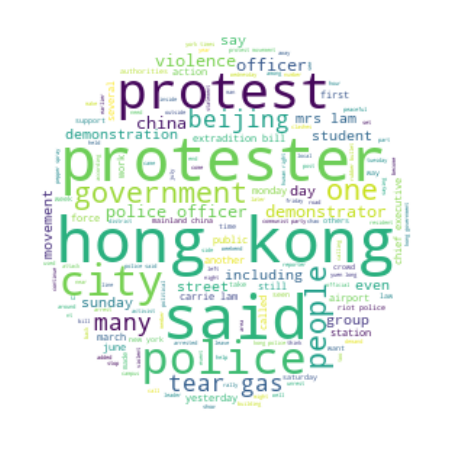

In [128]:
# word cloud plot - preprocessing
# don't think the word cloud adds a lot of value to the analysis, maybe if I would make a word cloud for each source, but seeing the most frequent words is enough
from wordcloud import WordCloud
all_words = ' '.join([word for word in df['tokenized_text']])

import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

In [129]:
# sort df by date
df.sort_values(by='date', inplace=True, ascending=True)

/var/folders/zn/8nxtt6mn6x7422mthq8hmz4c0000gn/T/ipykernel_14282/4026650585.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_plot.drop(["date"], 1, inplace=True)


[Text(0, 0.5, 'Word Count')]

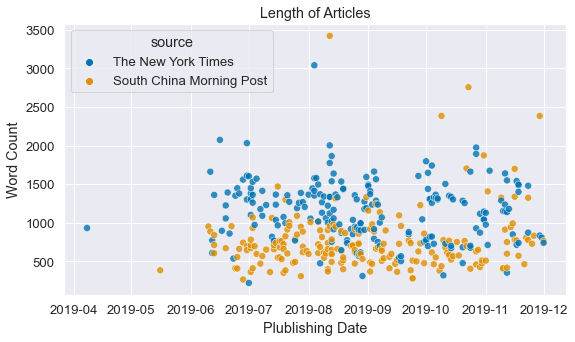

In [130]:
# REALISATION: data is NOT continous, for some dates there are no articles, so the x axis is not continuous and will be skewed. -> change that by setting index to date!
df_plot = df.set_index(pd.DatetimeIndex(df['date']))
df_plot.drop(["date"], 1, inplace=True)

sns.set_palette(sns.color_palette([source_colors[0], source_colors[1]]))
plt.figure(figsize = (9,5))
g = sns.scatterplot(x='date', y='words', data=df_plot, alpha=0.8, hue = 'source', s= 50)
g.set(title='Length of Articles')
g.set(xlabel="Plublishing Date")
g.set(ylabel="Word Count")


## First Sentiment Analysis

first impressions:
- general most articles are 'negative'
- could be because many articles are about the violence and not about hope for change or something positive
- interestingly the most positive article from the NYT is about Hong Kongers asking the US for help, which includes a lot of praise of the US

In [131]:
# initialize the analyzer object
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn

analyzer = SentimentIntensityAnalyzer()

In [132]:
# apply polarity scores to each text
df['polarity'] = df['tokenized_text'].apply(lambda x: analyzer.polarity_scores(x))
df.head(5)

,source,date,title,words,body,tokenized_text,polarity
51,The New York Times,2019-04-08,9 Hong Kong Democracy Advocates Convicted for ...,932,\nHONG KONG — Nine democracy activists on Tues...,hong kong nine democracy activists tuesday con...,"{'neg': 0.138, 'neu': 0.751, 'pos': 0.112, 'co..."
387,South China Morning Post,2019-05-16,Six activists found guilty over liaison office...,384,\nSix pro-democracy activists were yesterday f...,six prodemocracy activists yesterday found gui...,"{'neg': 0.169, 'neu': 0.756, 'pos': 0.075, 'co..."
271,South China Morning Post,2019-06-10,SOLIDARITY AND DEFIANCE Organisers say more th...,951,\nProtesters of all ages and from all walks of...,protesters ages walks life flooded streets hon...,"{'neg': 0.119, 'neu': 0.799, 'pos': 0.082, 'co..."
173,The New York Times,2019-06-11,"Bricks, Bottles and Tear Gas_ Protesters and P...",1661,\nRiot police turned downtown Hong Kong into a...,riot police turned downtown hong kong teargasf...,"{'neg': 0.192, 'neu': 0.714, 'pos': 0.094, 'co..."
276,South China Morning Post,2019-06-11,"Police faced 'organised, armed and prepared ra...",887,"\nOrganised, prepared, armed and radical - tha...",organised prepared armed radical police descri...,"{'neg': 0.176, 'neu': 0.755, 'pos': 0.068, 'co..."


In [133]:
# Change data structure to make it more readable
df = pd.concat(
    [df.drop(['polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,source,date,title,words,body,tokenized_text,neg,neu,pos,compound
51,The New York Times,2019-04-08,9 Hong Kong Democracy Advocates Convicted for ...,932,\nHONG KONG — Nine democracy activists on Tues...,hong kong nine democracy activists tuesday con...,0.138,0.751,0.112,-0.8622
387,South China Morning Post,2019-05-16,Six activists found guilty over liaison office...,384,\nSix pro-democracy activists were yesterday f...,six prodemocracy activists yesterday found gui...,0.169,0.756,0.075,-0.9552
271,South China Morning Post,2019-06-10,SOLIDARITY AND DEFIANCE Organisers say more th...,951,\nProtesters of all ages and from all walks of...,protesters ages walks life flooded streets hon...,0.119,0.799,0.082,-0.9612


In [134]:
# add dedicated column based on neg-neu-pos columns, becoming unique as "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df

,source,date,title,words,body,tokenized_text,neg,neu,pos,compound,sentiment
51,The New York Times,2019-04-08,9 Hong Kong Democracy Advocates Convicted for ...,932,\nHONG KONG — Nine democracy activists on Tues...,hong kong nine democracy activists tuesday con...,0.138,0.751,0.112,-0.8622,negative
387,South China Morning Post,2019-05-16,Six activists found guilty over liaison office...,384,\nSix pro-democracy activists were yesterday f...,six prodemocracy activists yesterday found gui...,0.169,0.756,0.075,-0.9552,negative
271,South China Morning Post,2019-06-10,SOLIDARITY AND DEFIANCE Organisers say more th...,951,\nProtesters of all ages and from all walks of...,protesters ages walks life flooded streets hon...,0.119,0.799,0.082,-0.9612,negative
173,The New York Times,2019-06-11,"Bricks, Bottles and Tear Gas_ Protesters and P...",1661,\nRiot police turned downtown Hong Kong into a...,riot police turned downtown hong kong teargasf...,0.192,0.714,0.094,-0.9983,negative
276,South China Morning Post,2019-06-11,"Police faced 'organised, armed and prepared ra...",887,"\nOrganised, prepared, armed and radical - tha...",organised prepared armed radical police descri...,0.176,0.755,0.068,-0.9939,negative
...,...,...,...,...,...,...,...,...,...,...,...
55,The New York Times,2019-11-29,Hong Kong Police End 2-Week Campus Siege,834,\nThe police found no protesters during a fina...,police found protesters final search polytechn...,0.216,0.709,0.076,-0.9965,negative
207,South China Morning Post,2019-11-29,Inside the siege of Polytechnic University Aft...,2383,"\nOn November 21, James Wong made his dash for...",november james wong made dash freedom wreckage...,0.202,0.734,0.064,-0.9996,negative
84,The New York Times,2019-11-30,"In Hong Kong , Campus Siege Comes to End 2 Wee...",807,\nThe police found no protesters during a fina...,police found protesters final search polytechn...,0.208,0.718,0.074,-0.9963,negative
206,South China Morning Post,2019-12-01,Tensions return to streets ahead of major rall...,764,\nTension returned to Hong Kong's streets last...,tension returned hong kong streets last night ...,0.145,0.730,0.124,-0.6249,negative


In [135]:
# Obtain tweet with highest positive sentiment
df.loc[df['compound'].idxmax()].values

array(['The New York Times', '2019-11-03',
       'Hong Kong Protesters Call for U.S. Help. China Sees a Conspiracy',
       1674,
       '\nThe United States, viewed as a champion of democracy, occupies a symbolic role in the protests. Activists now want President Trump to take a tougher stand against Beijing.\nHONG KONG — The  at times seem like love fests with the United States. Depending on the day, demonstrators wave American flags or       \xa0    , and even dress as       \xa0    , complete with shield.\nThe United States represents democracy, and the  hope that maybe, just maybe, it will save       \xa0    . Five months in, they are trying harder than ever to draw the United States into their movement.\nare pressing Hong Kong officials and their overseers, the authoritarian Communist Party leaders of China, for greater democratic rights and rule-of-law in the autonomous territory. As they see it, the Trump administration might be able to make demands of Chinese leaders or Hong 

<AxesSubplot:xlabel='sentiment'>

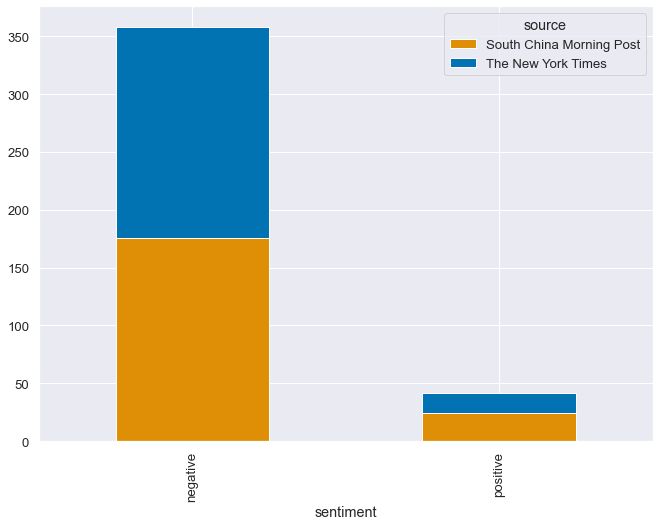

In [136]:
# visualize counts of positive, neutral and negative tweets

df_plot = df.groupby(['source', 'sentiment']).size().reset_index().pivot(columns='source', index='sentiment', values=0)
#sns.countplot(y='sentiment', 
             #data=df_plot, 
             #palette=['#b2d8d0',"#008080", '#b2d8d8'], stacked= True
             #)
df_plot.plot(kind='bar', stacked=True, color=[source_colors[1], source_colors[0]])
#no neutral articles?? almost all negative? interesting, could be because it is nearly impossible to get exactly 0 as compound score -> define neutral differently? or make more distinctions between slightly positive, slightly negative and positive, negative

In [137]:
print(df_plot)

source     South China Morning Post  The New York Times
sentiment                                              
negative                        176                 182
positive                         24                  18


/var/folders/zn/8nxtt6mn6x7422mthq8hmz4c0000gn/T/ipykernel_14282/2152731886.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_plot.drop(["date"], 1, inplace=True)


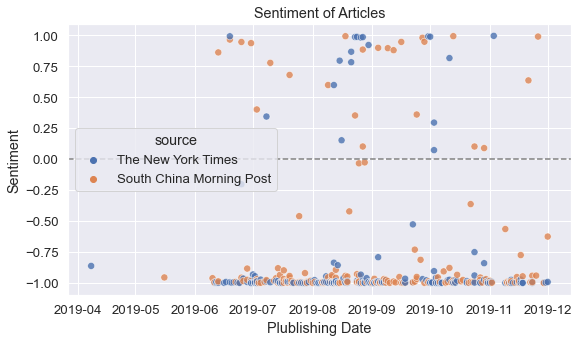

In [149]:
# visualize sentiment distribution over time

df_plot = df.set_index(pd.DatetimeIndex(df['date']))
df_plot.drop(["date"], 1, inplace=True)

sns.set(rc={'figure.figsize':(13,7)})
sns.set(font_scale=1.2)

plt.figure(figsize = (9,5))
g = sns.scatterplot(x='date', y='compound', data=df_plot, alpha=0.8, hue = 'source', s= 50)

g.set(title='Sentiment of Articles')
g.set(xlabel="Plublishing Date")
g.set(ylabel="Sentiment")


g.axhline(0, ls='--', c = 'grey')

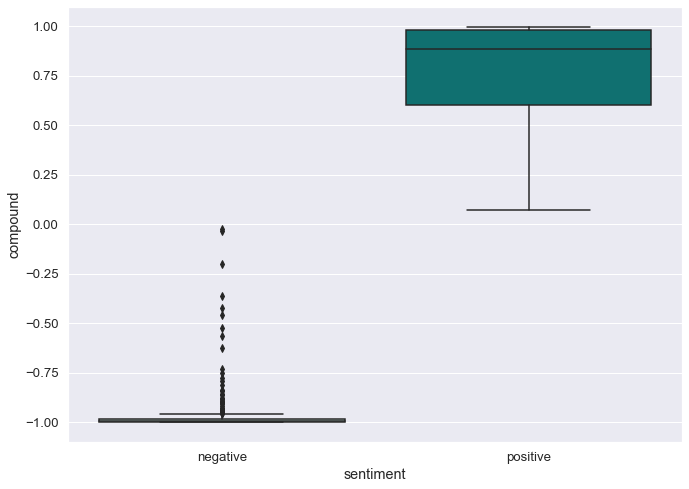

In [147]:
# boxplot of compound distribution (per sentiment)
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d0',"#008080", '#b2d8d8'], 
            data=df);

/Users/janawicklein/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/janawicklein/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


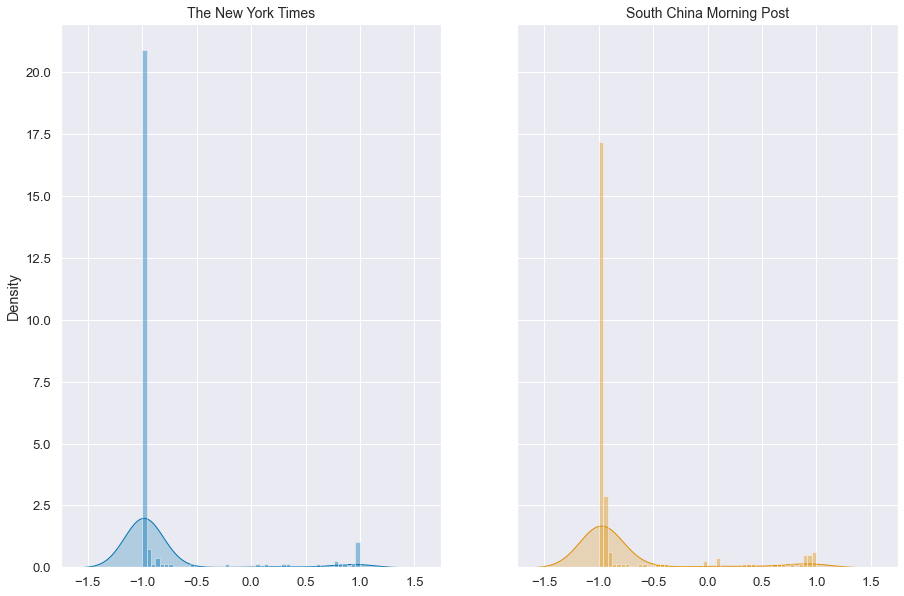

In [140]:
# visualize sentiment distribution with distplot and density curve for each source separately in subplots
#first to make it easier to understand the plots create fixed colour for each source
source_names = list(df['source'].value_counts().index)
source_colors = list(sns.color_palette('colorblind'))

fig, ax = plt.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)
ax = ax.flatten()
for ax, source, color in zip(ax, source_names, source_colors):
    sns.distplot(df.loc[df['source'] == source]['compound'],
                               ax=ax, color=color, kde_kws={'shade':True})
    ax.set_title(source, fontsize=14)
    ax.set_xlabel('')
    
plt.show()


/Users/janawicklein/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/janawicklein/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


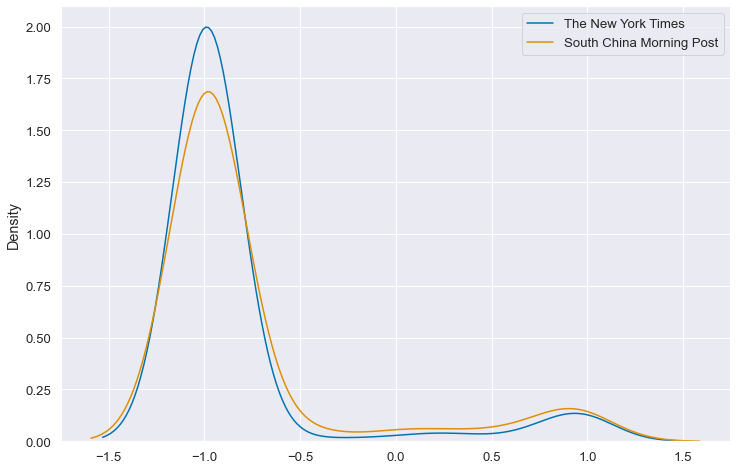

In [141]:
# Overlay each density curve on the same plot for closer comparison

fig, ax = plt.subplots(figsize=(12, 8))

for source, color in zip(source_names, source_colors):
    sns.distplot(df.loc[df['source'] == source]['compound'], label=source,
                               ax=ax, hist=False, color=color)
    ax.set_xlabel('')
plt.legend()
plt.show()

In [142]:
# save new df to csv
df.to_csv('Data/sentiment_analysis.csv')